In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


# Pre-Processing the Data

In [2]:
train = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
X_train = train.drop(['label'],axis=1)
y = train['label']

In [5]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [6]:
y.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
X_train.shape

(27455, 28, 28, 1)

### One-hot Encoding the target label to 25 classes

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y,num_classes=25)

In [9]:
import matplotlib.pyplot as plt

### Sample image from training set

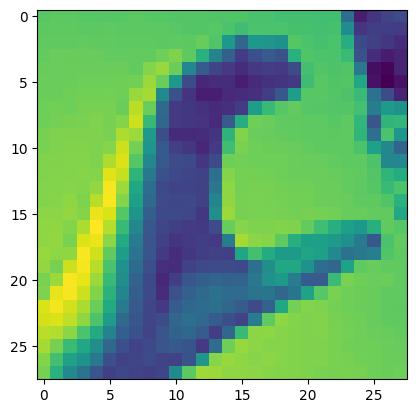

In [10]:
plt.imshow(X_train[2])

## CNN Implementation

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from sklearn.metrics import accuracy_score

### Model

In [12]:
model = Sequential([
    Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPool2D((3,3)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPool2D((3,3)),
    Flatten(),
    Dense(units=256,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=25,activation='softmax'),
])

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/5
858/858 [==============================] - 22s 25ms/step - loss: 0.0381 - accuracy: 0.9899
Epoch 2/5
858/858 [==============================] - 22s 25ms/step - loss: 0.0426 - accuracy: 0.9878
Epoch 3/5
858/858 [==============================] - 21s 24ms/step - loss: 0.0075 - accuracy: 0.9985
Epoch 4/5
858/858 [==============================] - 21s 25ms/step - loss: 5.8976e-04 - accuracy: 0.9999
Epoch 5/5
858/858 [==============================] - 22s 25ms/step - loss: 0.0808 - accuracy: 0.9799


## Model Testing

In [19]:
test = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
X_test = test.drop(['label'],axis=1)
y_test = test['label']

In [20]:
X_test = X_test.values.reshape(-1,28,28,1)

In [21]:
y_pred = model.predict(X_test)

858/858 [==============================] - 7s 8ms/step


In [22]:
y_pred = np.argmax(y_pred,axis=1)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

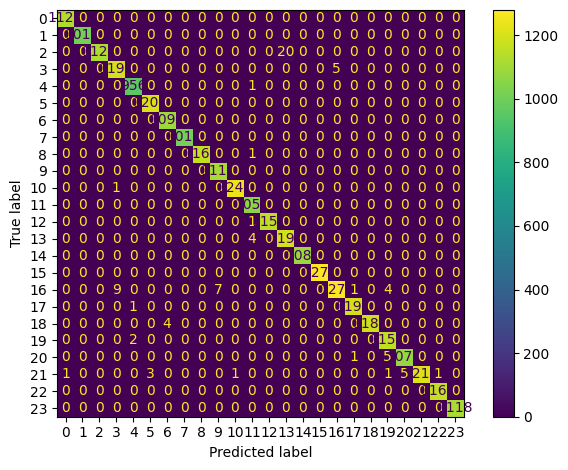

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(values_format="1g")
plt.tight_layout()
plt.show()

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.997122564195957
Precision: 0.9971381704865483
Recall: 0.997122564195957
F1 Score: 0.9971204608692114

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1126
           1       1.00      1.00      1.00      1010
           2       1.00      0.98      0.99      1144
           3       0.99      1.00      0.99      1196
           4       1.00      1.00      1.00       957
           5       1.00      1.00      1.00      1204
           6       1.00      1.00      1.00      1090
           7       1.00      1.00      1.00      1013
           8       1.00      1.00      1.00      1162
          10       0.99      1.00      1.00      1114
          11       1.00      1.00      1.00      1241
          12       0.99      1.00      1.00      1055
          13       1.00      1.00      1.00      1151
          14       0.98      1.00      0.99      1196
          15       1.00      1.00      1.00      10